In [1]:
'''importing the required libraries'''

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")
# Comment this if the data visualisations doesn't work on your side
%matplotlib inline
#plt.style.use('bmh')

In [2]:
# read all the data
ccba = pd.read_csv('public_train_x_ccba_full_hashed.csv') 
cdtx = pd.read_csv('public_train_x_cdtx0001_full_hashed.csv')
custinfo = pd.read_csv('public_train_x_custinfo_full_hashed.csv')
dp = pd.read_csv('public_train_x_dp_full_hashed.csv')
remit = pd.read_csv('public_train_x_remit1_full_hashed.csv')

public_alert_date = pd.read_csv('public_x_alert_date.csv')
train_alert_date = pd.read_csv('train_x_alert_date.csv')
y_answer = pd.read_csv('train_y_answer.csv')

In [3]:
ccba.head(20)

,cust_id,lupay,byymm,cycam,usgam,clamt,csamt,inamt,cucsm,cucah
0,0172056578071e83399216fcd640bdc4de4583149d0fd9...,0.0,0,152628.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0172056578071e83399216fcd640bdc4de4583149d0fd9...,0.0,30,152628.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0172056578071e83399216fcd640bdc4de4583149d0fd9...,0.0,61,152628.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0172056578071e83399216fcd640bdc4de4583149d0fd9...,0.0,91,152628.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0172056578071e83399216fcd640bdc4de4583149d0fd9...,0.0,122,152628.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0172056578071e83399216fcd640bdc4de4583149d0fd9...,0.0,153,152628.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0172056578071e83399216fcd640bdc4de4583149d0fd9...,0.0,183,152628.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0172056578071e83399216fcd640bdc4de4583149d0fd9...,0.0,214,152628.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0172056578071e83399216fcd640bdc4de4583149d0fd9...,0.0,244,152628.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0172056578071e83399216fcd640bdc4de4583149d0fd9...,0.0,275,152628.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
cdtx.head()

,cust_id,date,country,cur_type,amt
0,0174dff6a8a2038f9966d61d8450e19e3bd751e4051c2a...,1,130,47,2312.0
1,0174dff6a8a2038f9966d61d8450e19e3bd751e4051c2a...,10,130,47,808.0
2,0174dff6a8a2038f9966d61d8450e19e3bd751e4051c2a...,10,130,47,7099.0
3,0174dff6a8a2038f9966d61d8450e19e3bd751e4051c2a...,13,130,47,306.0
4,0174dff6a8a2038f9966d61d8450e19e3bd751e4051c2a...,15,130,47,255.0


In [ ]:
custinfo.head()

,alert_key,cust_id,risk_rank,occupation_code,total_asset,AGE
0,352249,82595ac69158ae08d34156784bdec0d9e2ca5b242b6d2a...,1,19.0,1465816.0,7
1,352253,b212d14cb35676926682b2cf849e295d948888f556c07e...,1,2.0,98177.0,2
2,352254,e5b0002791c7852644a2730abeaa893cdf14a072ef7812...,1,19.0,2052922.0,7
3,352280,74214c478dc6519fbefe4bc31693865bdcd698ab974b64...,3,15.0,201906.0,5
4,352282,0340e7611f0d82c3cb87e6194fa14bb2ccf8afbf1b3418...,1,12.0,7450.0,5


In [ ]:
dp.head()

,cust_id,debit_credit,tx_date,tx_time,tx_type,tx_amt,exchg_rate,info_asset_code,fiscTxId,txbranch,cross_bank,ATM
0,0172056578071e83399216fcd640bdc4de4583149d0fd9...,CR,36,18,2,68265.0,1.0,16,NaN,NaN,0,0
1,0172056578071e83399216fcd640bdc4de4583149d0fd9...,CR,42,17,2,932058.0,1.0,16,NaN,NaN,0,0
2,0172056578071e83399216fcd640bdc4de4583149d0fd9...,CR,39,18,2,6089.0,1.0,16,NaN,NaN,0,0
3,0172056578071e83399216fcd640bdc4de4583149d0fd9...,CR,49,15,2,776715.0,1.0,16,NaN,NaN,0,0
4,0172056578071e83399216fcd640bdc4de4583149d0fd9...,CR,70,19,2,61630.0,1.0,16,NaN,NaN,0,0


In [ ]:
remit.head()

,cust_id,trans_date,trans_no,trade_amount_usd
0,01b1735c3dbf0a35c1c989bb45434ce4326b365b73db06...,148,0,100528.0
1,01b1735c3dbf0a35c1c989bb45434ce4326b365b73db06...,165,0,100528.0
2,01b1735c3dbf0a35c1c989bb45434ce4326b365b73db06...,231,0,89479.0
3,01b1735c3dbf0a35c1c989bb45434ce4326b365b73db06...,291,0,100528.0
4,01b1735c3dbf0a35c1c989bb45434ce4326b365b73db06...,389,0,30158.0


In [ ]:
public_alert_date.head()

,alert_key,date
0,352342,365
1,352866,365
2,352696,365
3,352330,365
4,352683,365


In [4]:
# # merge dp with y_answer using 'cust_id'
# custinfo_data = pd.merge(custinfo, y_answer, on='alert_key', how='outer')
# # merge custinfo_data with dp using 'cust_id'
# custinfo_data_dp = pd.merge(custinfo_data, dp, on='cust_id', how='outer')


custinfo_data_dp = pd.merge(custinfo,dp,on='cust_id').merge(y_answer,on='alert_key')


In [ ]:
custinfo_data_dp.head()

,alert_key,cust_id,risk_rank,occupation_code,total_asset,AGE,debit_credit,tx_date,tx_time,tx_type,tx_amt,exchg_rate,info_asset_code,fiscTxId,txbranch,cross_bank,ATM,sar_flag
0,172802,82595ac69158ae08d34156784bdec0d9e2ca5b242b6d2a...,1,19.0,1449978.0,7,DB,98,10,2,5241.0,28.0350,20,NaN,NaN,0,1,0
1,172802,82595ac69158ae08d34156784bdec0d9e2ca5b242b6d2a...,1,19.0,1449978.0,7,CR,92,9,2,10481.0,27.9250,20,NaN,NaN,0,1,0
2,172802,82595ac69158ae08d34156784bdec0d9e2ca5b242b6d2a...,1,19.0,1449978.0,7,CR,110,2,2,4557.0,4.3245,16,NaN,NaN,0,0,0
3,172802,82595ac69158ae08d34156784bdec0d9e2ca5b242b6d2a...,1,19.0,1449978.0,7,DB,111,22,2,6289.0,28.0550,20,NaN,NaN,0,1,0
4,172802,82595ac69158ae08d34156784bdec0d9e2ca5b242b6d2a...,1,19.0,1449978.0,7,CR,77,18,2,10481.0,27.7750,20,NaN,NaN,0,1,0


In [5]:
custinfo_data_dp.drop(['alert_key', 'cust_id'], axis=1, inplace=True)

In [6]:
# turn 'debit_credit' into dummy variables
custinfo_data_dp = pd.get_dummies(custinfo_data_dp, columns=['debit_credit'])


In [9]:
# fill Nan values with 0
custinfo_data_dp.fillna(0, inplace=True)

In [10]:
custinfo_data_dp.head()

,risk_rank,occupation_code,total_asset,AGE,tx_date,tx_time,tx_type,tx_amt,exchg_rate,info_asset_code,fiscTxId,txbranch,cross_bank,ATM,sar_flag,debit_credit_CR,debit_credit_DB
0,1,19.0,1449978.0,7,98,10,2,5241.0,28.0350,20,0.0,0.0,0,1,0,0,1
1,1,19.0,1449978.0,7,92,9,2,10481.0,27.9250,20,0.0,0.0,0,1,0,1,0
2,1,19.0,1449978.0,7,110,2,2,4557.0,4.3245,16,0.0,0.0,0,0,0,1,0
3,1,19.0,1449978.0,7,111,22,2,6289.0,28.0550,20,0.0,0.0,0,1,0,0,1
4,1,19.0,1449978.0,7,77,18,2,10481.0,27.7750,20,0.0,0.0,0,1,0,1,0


<AxesSubplot: title={'center': 'Correlation Matrix'}>

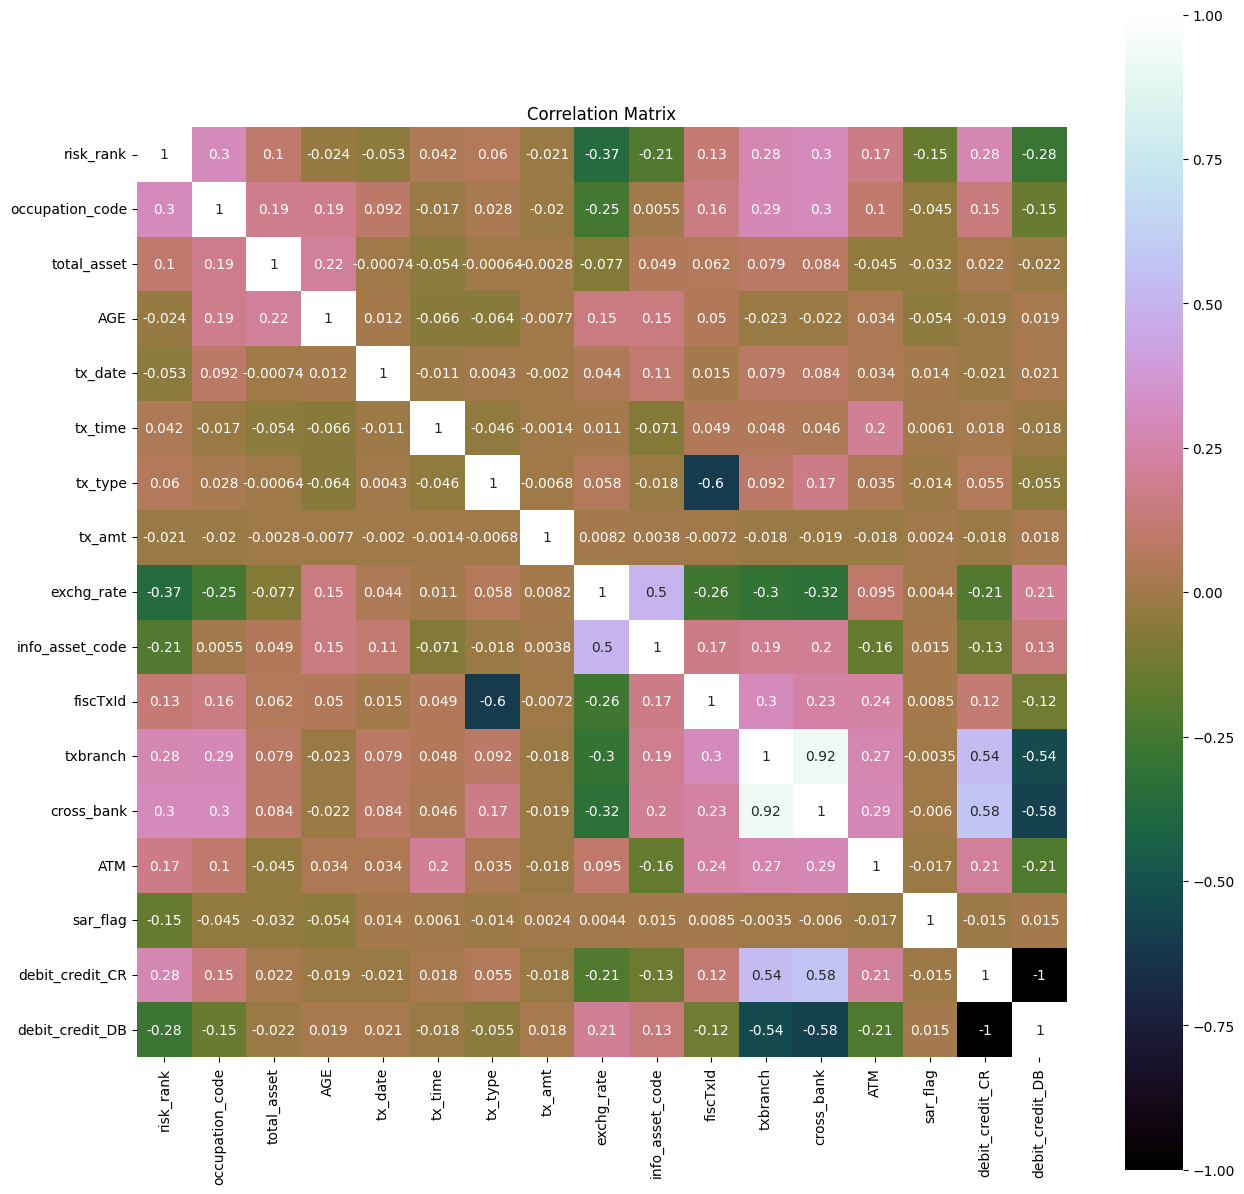

In [11]:
correlation = custinfo_data_dp.corr()
plt.figure(figsize=(15,15))
plt.title('Correlation Matrix')
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='cubehelix')

sar_flag跟所有東西都不太相關
哭了

In [12]:
# train test split
X = custinfo_data_dp.drop(['sar_flag'], axis=1)
Y = custinfo_data_dp['sar_flag']
X_train, X_valid, Y_train, Y_valid = train_test_split(X, Y, test_size=0.2, random_state=42)
print(X.info())
print(Y.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28551050 entries, 0 to 28551049
Data columns (total 16 columns):
 #   Column           Dtype  
---  ------           -----  
 0   risk_rank        int64  
 1   occupation_code  float64
 2   total_asset      float64
 3   AGE              int64  
 4   tx_date          int64  
 5   tx_time          int64  
 6   tx_type          int64  
 7   tx_amt           float64
 8   exchg_rate       float64
 9   info_asset_code  int64  
 10  fiscTxId         float64
 11  txbranch         float64
 12  cross_bank       int64  
 13  ATM              int64  
 14  debit_credit_CR  uint8  
 15  debit_credit_DB  uint8  
dtypes: float64(6), int64(8), uint8(2)
memory usage: 3.2 GB
None
<class 'pandas.core.series.Series'>
Int64Index: 28551050 entries, 0 to 28551049
Series name: sar_flag
Non-Null Count     Dtype
--------------     -----
28551050 non-null  int64
dtypes: int64(1)
memory usage: 435.7 MB
None


In [17]:
#ramdom forest
#Import library
from sklearn.ensemble import RandomForestClassifier
from sklearn import ensemble, metrics
from numpy import random
import joblib
import os

forest = RandomForestClassifier(n_estimators = 10,verbose=1,criterion='entropy')

if os.path.exists('forest_model'):
    forest = joblib.load('forest_model')
else:
    #Train model
    forest.fit(X_train,Y_train) 

    #save model
    joblib.dump(forest, 'forest_model')

In [21]:
def print_acc(expected,predicted):
    print(metrics.classification_report(expected,predicted))
    print(metrics.confusion_matrix(expected, predicted))
    accuracy = accuracy_score(expected, predicted)
    print("Accuracy: %.2f%%" % (accuracy * 100.0))

    # print("Average = macro")
    print('precision:',metrics.precision_score(expected, predicted,average='macro')) 
    print('recall:',metrics.recall_score(expected, predicted,average='macro'))
    print('F1-score:',metrics.f1_score(expected, predicted,average='macro'))


predicted = forest.predict(X_valid)
print_acc(Y_valid,predicted)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    5.4s finished


              precision    recall  f1-score   support

           0       1.00      1.00      1.00   5659963
           1       0.97      0.82      0.89     50247

    accuracy                           1.00   5710210
   macro avg       0.98      0.91      0.94   5710210
weighted avg       1.00      1.00      1.00   5710210

[[5658475    1488]
 [   8919   41328]]
Accuracy: 99.82%
precision: 0.9818364487944413
recall: 0.9111169831197028
F1-score: 0.9436268895516722


### 製作一個測試集，測試模型對1的敏感度

In [33]:
# train test split
test_0 = custinfo_data_dp.loc[custinfo_data_dp['sar_flag'] == 0].sample(100000)
test_1 = custinfo_data_dp.loc[custinfo_data_dp['sar_flag'] == 1].sample(10)
test = pd.concat([test_0,test_1])

# print(test)

X_test = test.drop('sar_flag',axis=1)
Y_test = test['sar_flag']

predicted=forest.predict(X_test)

print_acc(Y_test,predicted)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    100000
           1       0.45      1.00      0.62        10

    accuracy                           1.00    100010
   macro avg       0.73      1.00      0.81    100010
weighted avg       1.00      1.00      1.00    100010

[[99988    12]
 [    0    10]]
Accuracy: 99.99%
precision: 0.7272727272727273
recall: 0.99994
F1-score: 0.812469998199892


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


### 提交符合範例的csv檔案

In [32]:
x = pd.read_csv('預測的案件名單及提交檔案範例.csv').drop('probability',axis=1)
# x = pd.merge(custinfo_data_dp,x,on='alert_key')
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3850 entries, 0 to 3849
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   alert_key  3850 non-null   int64
dtypes: int64(1)
memory usage: 30.2 KB
